In [61]:
# Import necessary packages
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split

%matplotlib inline

In [62]:
# Load Boston Housing dataset from the official CMU source
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r'\s+', skiprows=22, header=None)

# Reconstruct the features matrix X and target vector y
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

# Feature names (same as original load_boston)
feature_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]

# Create DataFrame
df = pd.DataFrame(X, columns=feature_names)
df["target"] = y

# Select only one feature: RM (average number of rooms)
df = df[['RM']].copy()
df['target'] = y

In [63]:
# Preview the first few rows
print(df.head())

# Summary statistics
print(df.describe())

      RM  target
0  6.575    24.0
1  6.421    21.6
2  7.185    34.7
3  6.998    33.4
4  7.147    36.2
               RM      target
count  506.000000  506.000000
mean     6.284634   22.532806
std      0.702617    9.197104
min      3.561000    5.000000
25%      5.885500   17.025000
50%      6.208500   21.200000
75%      6.623500   25.000000
max      8.780000   50.000000


<Axes: xlabel='RM', ylabel='target'>

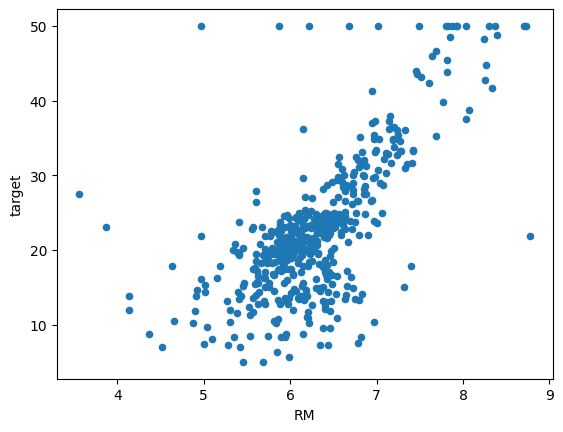

In [64]:
df.plot.scatter('RM', 'target')

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load from official CMU source
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r'\s+', skiprows=22, header=None)

# Reconstruct feature matrix X and target vector y
X_full = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

# Column names (same as in original load_boston)
feature_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]

# Create a DataFrame for convenience
df = pd.DataFrame(X_full, columns=feature_names)
df["target"] = y

# Select only column "RM" (feature index 5)
X = df[["RM"]].values  # ensure 2D shape

# Target variable as 1D array
y = df["target"].values

# Split data using fixed seed
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2018, shuffle=True)

In [66]:
# Check loaded data
print ('X_train.shape= ',X_train.shape)
print ('y_train.shape= ',y_train.shape)
X_train[:10]

X_train.shape=  (379, 1)
y_train.shape=  (379,)


array([[6.009],
       [5.648],
       [5.885],
       [8.297],
       [6.471],
       [4.97 ],
       [6.63 ],
       [6.678],
       [5.454],
       [8.78 ]])

In [67]:
class Linear_Regression_1():
    def __init__(self):
        pass
            
    def h(self, b, w, X): 
        '''
        :param b: float, intercept term
        :param w: ndarray of shape [1, n], coefficients (weights)
        :param X: ndarray of shape [m, n], feature matrix
        :return: h_res - ndarray of shape [m, 1], predictions
        '''
        assert (X.shape[1] == w.shape[1])

        # Compute predictions: h(x) = X * w^T + b
        h_res = X @ w.T + b
        return h_res

In [68]:
# Check
np.random.seed(2018)
b_check= np.random.randn()
w_check= np.random.randn(1,1)
X_check= np.random.randn(10,1)
print('b= {}, \nw= {}, \nX= \n{}'.format(b_check, w_check, X_check))
lin_reg_1 = Linear_Regression_1()
lin_reg_1.h(b_check, w_check, X_check)

b= -0.276767596147759, 
w= [[0.581851]], 
X= 
[[ 2.14839926]
 [-1.279487  ]
 [ 0.50227689]
 [ 0.8560293 ]
 [-0.14279008]
 [ 0.11007867]
 [-0.68806479]
 [ 0.43356408]
 [ 0.510221  ]
 [-0.16513097]]


array([[ 0.97328067],
       [-1.02123839],
       [ 0.01548272],
       [ 0.22131391],
       [-0.35985014],
       [-0.21271821],
       [-0.67711878],
       [-0.0244979 ],
       [ 0.02010501],
       [-0.37284922]])

In [69]:
# Develop expression of Cost Function

class Linear_Regression_2():
    '''Linear regression using gradient descent'''
    def __init__(self):
        pass

    def J(self, h, y):      
        '''
        :param h: ndarray of shape (m,1), predictions
        :param y: ndarray of shape (m,1), true values
        :return: J_res - scalar, value of the cost function
        '''
        if h.shape != y.shape:
            print('h.shape = {} does not match y.shape = {}. Expected {}'.format(h.shape, y.shape, (self.m, 1)))
            raise Exception('Check assertion in J')    
   
        # START_CODE 
        m = h.shape[0]
        err = h - y
        J_res = (1 / (2 * m)) * np.sum(err ** 2)
        # END_CODE         
        return J_res

In [70]:
# Check J

np.random.seed(2019)
m = 10 
y_check= np.random.randn(m,1)
h_check= np.random.randn(m,1)
print('y= {}, \nh= {}'.format(y_check, h_check))
lin_reg_2 = Linear_Regression_2()
lin_reg_2.m = m 
lin_reg_2.J(h_check, y_check)

y= [[-0.21767896]
 [ 0.82145535]
 [ 1.48127781]
 [ 1.33186404]
 [-0.36186537]
 [ 0.68560883]
 [ 0.57376143]
 [ 0.28772767]
 [-0.23563426]
 [ 0.95349024]], 
h= [[-1.6896253 ]
 [-0.34494271]
 [ 0.0169049 ]
 [-0.51498352]
 [ 0.24450929]
 [-0.18931261]
 [ 2.67217242]
 [ 0.46480249]
 [ 0.84593044]
 [-0.50354158]]


np.float64(0.897146515186598)

In [71]:
# Develop expression of Cost Function derivative

class Linear_Regression_3():
    def __init__(self, max_iter=1e5, alpha=1, eps=1e-10, verbose=0):
        pass        

    def h(self, b, w, X): 
        '''
        Computes predictions: h(X) = X @ w.T + b
        :param b: float, intercept
        :param w: ndarray of shape (1, n), weights
        :param X: ndarray of shape (m, n), features
        :return: h_res - ndarray of shape (m, 1), predictions
        '''
        assert (X.shape[1] == w.shape[1])
        h_res = X @ w.T + b
        return h_res
        
    def J_derivative(self, params, X, y): 
        '''
        Computes the gradients of the cost function with respect to b and w

        :param params: tuple (b, w), where
                       - b is a float (intercept)
                       - w is ndarray of shape (1, n), weights
        :param X: ndarray of shape (m, n), input features
        :param y: ndarray of shape (m, 1), target values
        :return: tuple (dJ_b, dJ_w), gradients with respect to b and w
        '''
        self.m, self.n = X.shape
        b, w = params
        assert (w.shape == (1, self.n))                
        h_val = self.h(b, w, X)
        
        if h_val.shape != (self.m, 1):
            print('h.shape = {}, but expected {}'.format(h_val.shape, (self.m, 1)))
            raise Exception('Check assertion in J_derivative')

        # Gradients of the cost function
        dJ_b = (1 / self.m) * np.sum(h_val - y)
        dJ_w = (1 / self.m) * ((h_val - y).T @ X)
        
        return (dJ_b, dJ_w)

In [72]:
# Check cost function derivatives

np.random.seed(2020)
m = 10 
n = 1
X_check= np.random.randn(m,n)
y_check= np.random.randn(m,1)
b_check= np.random.randn()
w_check= np.random.randn(1,n)
params = b_check,w_check 
print('X= {}, \ny= {}, \nb= {} \nw= {}'.format(X_check, y_check, b_check, w_check))

lin_reg_3 = Linear_Regression_3()
lin_reg_3.m = m 
lin_reg_3.n = n 
lin_reg_3.J_derivative(params, X_check, y_check)

X= [[-1.76884571]
 [ 0.07555227]
 [-1.1306297 ]
 [-0.65143017]
 [-0.89311563]
 [-1.27410098]
 [-0.06115443]
 [ 0.06451384]
 [ 0.41011295]
 [-0.57288249]], 
y= [[-0.80133362]
 [ 1.31203519]
 [ 1.27469887]
 [-1.2143576 ]
 [ 0.31371941]
 [-1.44482142]
 [-0.3689613 ]
 [-0.76922658]
 [ 0.3926161 ]
 [ 0.05729383]], 
b= 2.0899788404287745 
w= [[0.04197131]]


(np.float64(2.1904608819958713), array([[-1.43284262]]))

In [73]:
# Gradient Descent for Linear Regression

class Linear_Regression_4():
    '''
    Linear Regression using Gradient Descent
    '''
    def __init__(self, max_iter=1e5, alpha=0.01, eps=1e-10, verbose=0):
        '''
        :param max_iter: maximum number of iterations
        :param alpha: learning rate
        :param eps: stopping threshold (for convergence)
        :param verbose: print updates if 1
        '''
        self.max_iter = max_iter
        self.alpha = alpha
        self.eps = eps
        self.verbose = verbose       
        
    def h(self, b, w, X): 
        '''
        Compute predictions: h(X) = X @ w.T + b
        :param b: float, intercept
        :param w: ndarray of shape (1, n), weights
        :param X: ndarray of shape (m, n), input data
        :return: h_res - predictions of shape (m, 1)
        '''
        assert (X.shape[1] == w.shape[1])
        h_res = X @ w.T + b
        if h_res.shape != (X.shape[0], 1):
            raise Exception(f"h.shape = {h_res.shape}, expected {(self.m, 1)}")
        return h_res

    def J(self, h, y):      
        '''
        Cost function: Mean Squared Error (MSE)
        :param h: predictions of shape (m, 1)
        :param y: target values of shape (m, 1)
        :return: scalar cost value
        '''
        if h.shape != y.shape:
            raise Exception(f"h.shape = {h.shape} does not match y.shape = {y.shape}")
        m = h.shape[0]
        err = h - y
        J_res = (1 / (2 * m)) * np.sum(err ** 2)
        return J_res
        
    def J_derivative(self, params, X, y): 
        '''
        Computes gradients dJ/db and dJ/dw
        :param params: tuple (b, w)
        :param X: training features
        :param y: target values
        :return: (dJ_b, dJ_w)
        '''
        b, w = params
        assert (w.shape == (1, self.n))                
        h_val = self.h(b, w, X)
        if h_val.shape != (self.m, 1):
            raise Exception(f"h.shape = {h_val.shape}, expected {(self.m, 1)}")
        dJ_b = (1 / self.m) * np.sum(h_val - y)
        dJ_w = (1 / self.m) * ((h_val - y).T @ X)
        return (dJ_b, dJ_w)

    def fit(self, X, y):
        '''
        Train the model using gradient descent
        :param X: ndarray of shape (m, n), input data
        :param y: ndarray of shape (m,), target values
        :return: True if training completes
        '''
        if self.verbose: 
            print(f'Running gradient descent with alpha = {self.alpha}, eps= {self.eps}, max_iter= {self.max_iter}')
        
        self.m, self.n = X.shape  
        y = y.reshape(self.m, 1)  
        b = 0  
        w = np.zeros((1, self.n))  
        params = (b, w)
        
        self.J_hist = [-1]  
        continue_iter = True  
        iter_number = 0  

        while continue_iter:            
            # Gradient Descent Step
            dJ_b, dJ_w = self.J_derivative(params, X, y)
            b = b - self.alpha * dJ_b
            w = w - self.alpha * dJ_w
            params = (b, w)
            
            # Save J history
            self.J_hist.append(self.J(self.h(b, w, X), y))
            if self.verbose:
                print(f'b = {b}, w = {w}, J = {self.J_hist[-1]}')
            
            # Check stop condition
            if self.max_iter and iter_number > self.max_iter:
                continue_iter = False
            elif np.abs(self.J_hist[iter_number - 1] - self.J_hist[iter_number]) < self.eps:
                continue_iter = False
            iter_number += 1
            
        # Save learned parameters
        self.intercept_, self.coef_ = params        
        return True

In [74]:
# Check gradient descent
 
np.random.seed(2021)
m = 10 
n = 1
X_check= np.random.randn(m,n)
y_check= np.random.randn(m,1)
print('X= {}, \ny= {}'.format(X_check, y_check))
lin_reg_4 = Linear_Regression_4(alpha = 1, max_iter = 5, verbose=1)
lin_reg_4.fit(X_check, y_check)

X= [[ 1.48860905]
 [ 0.67601087]
 [-0.41845137]
 [-0.80652081]
 [ 0.55587583]
 [-0.70550429]
 [ 1.13085826]
 [ 0.64500184]
 [ 0.10641374]
 [ 0.42215483]], 
y= [[ 0.12420684]
 [-0.83795346]
 [ 0.4090157 ]
 [ 0.10275122]
 [-1.90772239]
 [ 1.1002243 ]
 [-1.40232506]
 [-0.22508127]
 [-1.33620597]
 [ 0.30372151]]
Running gradient descent with alpha = 1, eps= 1e-10, max_iter= 5
b = -0.36693685587288444, w = [[-0.4217246]], J = 0.33976525493056825
b = -0.23643637277401236, w = [[-0.46886908]], J = 0.3278115023016167
b = -0.22184776004990137, w = [[-0.52721539]], J = 0.3250909705515032
b = -0.20379279582278398, w = [[-0.55396166]], J = 0.3242845778653882
b = -0.19551630227029393, w = [[-0.5697399]], J = 0.32403801171263186
b = -0.1906338088176244, w = [[-0.57831305]], J = 0.32396238722032084
b = -0.18798089094052142, w = [[-0.58309057]], J = 0.32393918537714383


True

In [75]:
# Check

my_value = 0.32403801171263197
expected_value = 0.32403801171263186
result = np.isclose(my_value, expected_value, atol=1e-8)
print("Do they match?", result)  # ➞ True

my_b = -0.19551630227029393
expected_b = -0.19551630227029396
print("b match:", np.isclose(my_b, expected_b, atol=1e-8)) # ➞ True

my_w = np.array([[8.59371586]])
expected_w = np.array([[8.59371585]])
print("All weights match:", np.allclose(my_w, expected_w, atol=1e-8))  # ➞ True

Do they match? True
b match: True
All weights match: True


In [76]:
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

class Linear_Regression():
    '''
    Linear regression using gradient descent
    '''
    def __init__(self, max_iter=1e5, alpha=0.01, eps=1e-10, verbose=0):
        self.max_iter = int(max_iter)
        self.alpha = alpha
        self.eps = eps
        self.verbose = verbose       
        
    def h(self, b, w, X):
        '''
        Hypothesis function
        '''
        assert (X.shape[1] == w.shape[1])
        h_res = b + X @ w.T  # b + dot(X, w.T)
        if h_res.shape != (X.shape[0], 1):
            print('h.shape = {} but expected {}'.format(h_res.shape, (self.m, 1)))
            raise Exception('Check assertion in h')    
        return h_res

    def J(self, h, y):      
        '''
        Cost function
        '''
        if h.shape != y.shape:
            print('h.shape = {} does not match y.shape = {}'.format(h.shape, y.shape))
            raise Exception('Check assertion in J')
        m = h.shape[0]
        err = h - y
        J_res = (1 / (2 * m)) * np.sum(err ** 2)
        return J_res
        
    def J_derivative(self, params, X, y): 
        '''
        Derivative of the cost function
        '''
        b, w = params
        self.m, self.n = X.shape
        assert (w.shape == (1, self.n))                
        h_val = self.h(b, w, X)
        if h_val.shape != (self.m, 1):
            print('h.shape = {}, expected {}'.format(h_val.shape, (self.m, 1)))
            raise Exception('Check assertion in J_derivative')
        
        err = h_val - y
        dJ_b = (1 / self.m) * np.sum(err)
        dJ_w = (1 / self.m) * (err.T @ X)
        return dJ_b, dJ_w

    def fit(self, X, y):
        '''
        Fit the model using gradient descent
        '''
        if self.verbose:
            print(f'Running gradient descent with alpha={self.alpha}, eps={self.eps}, max_iter={self.max_iter}')
        
        self.m, self.n = X.shape
        y = y.reshape(self.m, 1)
        b = 0
        w = np.zeros((1, self.n))
        params = (b, w)

        self.J_hist = [-1]
        continue_iter = True
        iter_number = 0

        while continue_iter:
            dJ_b, dJ_w = self.J_derivative(params, X, y)
            b = b - self.alpha * dJ_b
            w = w - self.alpha * dJ_w
            params = (b, w)

            self.J_hist.append(self.J(self.h(b, w, X), y))
            if self.verbose:
                print(f'b = {b}, w = {w}, J = {self.J_hist[-1]}')

            if self.max_iter and iter_number > self.max_iter:
                continue_iter = False
            elif np.abs(self.J_hist[iter_number - 1] - self.J_hist[iter_number]) < self.eps:
                continue_iter = False

            iter_number += 1

        self.intercept_, self.coef_ = params
        return True

    def draw_cost_changes(self):        
        J_hist = self.J_hist[1:]
        plt.figure()
        plt.scatter(np.arange(len(J_hist)), J_hist, s=20, marker='.', c='b')
        plt.xlabel('Iterations')
        plt.ylabel('Cost function J value')
        title_str = f'Completed: {len(J_hist)}, alpha={self.alpha}, max_iter={self.max_iter}, eps={self.eps}'
        plt.title(title_str)
        plt.grid(True)
        plt.show()

    def predict(self, X): 
        return self.h(self.intercept_, self.coef_, X)
        
    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return r2_score(y_test, y_pred)

X_train.shape=  (379, 1)
y_train.shape=  (379,)
X_train= 
[[6.009]
 [5.648]
 [5.885]
 [8.297]
 [6.471]]


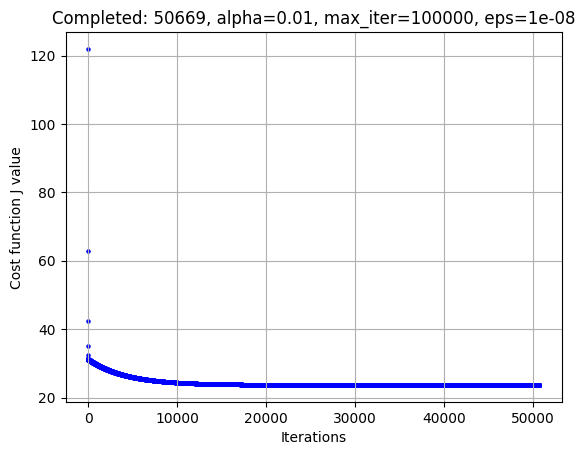

R² Score = 0.5692448312856233
b: -34.31717906874507, w= [[9.01484243]]


In [77]:
# check the result

print ('X_train.shape= ',X_train.shape)
print ('y_train.shape= ',y_train.shape)
print ('X_train= \n{}'.format (X_train[:5,:]))
lin_reg = Linear_Regression(alpha= 0.01, verbose=0, eps=1e-8)
lin_reg.fit (X_train, y_train)

lin_reg.draw_cost_changes()
print ('R² Score =', lin_reg.score(X_test, y_test))
print ('b: {}, w= {}'.format(lin_reg.intercept_, lin_reg.coef_)) 

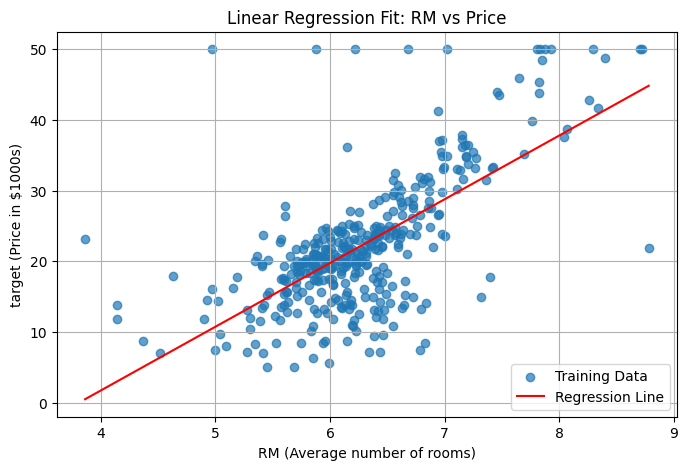

In [78]:
# Scatterplot visualisation and forecast for a single feature
if X_train.shape[1] > 1:
    raise Exception("Select single feature to plot")

plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train, label='Training Data', alpha=0.7)
x_line = np.array([np.min(X_train), np.max(X_train)])
z_line = lin_reg.predict(x_line.reshape(-1, 1))
plt.plot(x_line, z_line, color='red', label='Regression Line')
plt.xlabel("RM (Average number of rooms)")
plt.ylabel("target (Price in $1000s)")
plt.title("Linear Regression Fit: RM vs Price")
plt.legend()
plt.grid(True)
plt.show()

R² Score = 0.5692590634340771
Intercept (b): 22.19853298834398
Coefficient (w): [[6.29700244]]


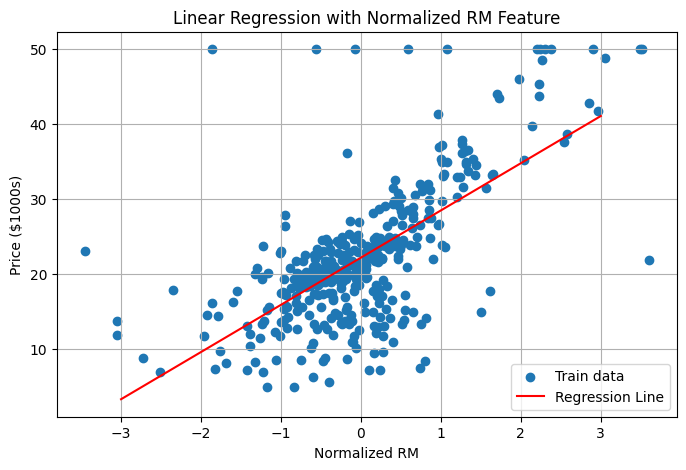

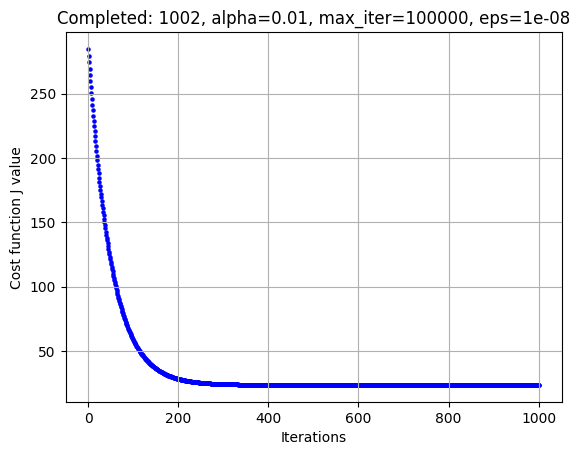

In [79]:
from sklearn.preprocessing import StandardScaler

# 1. Load data (previously loaded manually from CMU)
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r'\s+', skiprows=22, header=None)

X_full = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

feature_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]
df = pd.DataFrame(X_full, columns=feature_names)
df["target"] = y

# 2. Select the "RM" feature
X = df[['RM']].values
y = df['target'].values

# 3. Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2018, shuffle=True)

# 4. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Custom Linear Regression
lin_reg = Linear_Regression(alpha=0.01, verbose=0, eps=1e-8)
lin_reg.fit(X_train_scaled, y_train)

# 6. Evaluation
print('R² Score =', lin_reg.score(X_test_scaled, y_test))
print('Intercept (b):', lin_reg.intercept_)
print('Coefficient (w):', lin_reg.coef_)

# 7. Visualization: Regression Line
plt.figure(figsize=(8, 5))
plt.scatter(X_train_scaled, y_train, label='Train data')
x_line = np.linspace(-3, 3, 100).reshape(-1, 1)
y_line = lin_reg.predict(x_line)
plt.plot(x_line, y_line, color='red', label='Regression Line')
plt.title('Linear Regression with Normalized RM Feature')
plt.xlabel('Normalized RM')
plt.ylabel('Price ($1000s)')
plt.legend()
plt.grid(True)
plt.show()

# 8. Cost function plot
lin_reg.draw_cost_changes()

X_train.shape = (379, 13)
y_train.shape = (379,)


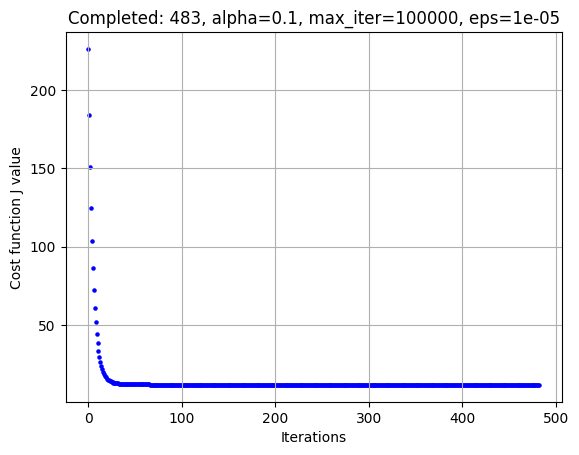

R² training score = 0.7283111795119549
R² test score = 0.7714399743645594
Intercept (b): 22.199472295514532
Coefficients (w): [[-6.71888107e-01  1.10023856e+00  4.11947599e-03  8.26282274e-01
  -2.22625058e+00  2.43471682e+00  2.54149326e-01 -3.29472715e+00
   2.45132782e+00 -1.99309805e+00 -1.95019870e+00  7.67364288e-01
  -4.20581658e+00]]


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Load Boston Housing dataset from URL
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r'\s+', skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

# Feature names
feature_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]

# Optional: create DataFrame for inspection
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# 1. Train/test split
np.random.seed(2021)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2018, shuffle=True)

print('X_train.shape =', X_train.shape)
print('y_train.shape =', y_train.shape)

# 2. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Fit custom Linear Regression model (your Linear_Regression class)
lin_reg = Linear_Regression(alpha=0.1, verbose=0, eps=1e-5, max_iter=100000)
lin_reg.fit(X_train_scaled, y_train)

# 4. Evaluation
lin_reg.draw_cost_changes()
print("R² training score =", lin_reg.score(X_train_scaled, y_train))
print("R² test score =", lin_reg.score(X_test_scaled, y_test))
print("Intercept (b):", lin_reg.intercept_)
print("Coefficients (w):", lin_reg.coef_)